In [31]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt

In [32]:
#df = pd.read_pickle('retreats.pik')

In [46]:
if False:
    df = pd.read_pickle('retreats1.pik')
else:
    dfs = list()
    for year in range(2011,2019):
#        dfs.append(pd.read_pickle('Rink-Isbrae/retreats_{}.pik'.format(year)))
        dfs.append(pd.read_pickle('GRE_G0240_retreats_{}.pik'.format(year)))

    df = pd.concat(dfs)
df

,year,sigma_max,time,adv_area,ret_area
0,2011,100000.0,2011-01-01 00:00:00,0.0,0.0
1,2011,100000.0,2011-01-01 08:45:57,0.0,1750000.0
2,2011,100000.0,2011-01-01 17:31:54,10000.0,940000.0
3,2011,100000.0,2011-01-02 02:17:51,10000.0,1380000.0
4,2011,100000.0,2011-01-02 11:03:48,10000.0,1460000.0
...,...,...,...,...,...
868,2018,500000.0,2018-03-21 07:13:27,5330000.0,980000.0
869,2018,500000.0,2018-03-24 07:39:24,5560000.0,1030000.0
870,2018,500000.0,2018-03-27 07:28:01,5800000.0,940000.0
871,2018,500000.0,2018-03-30 06:12:23,6070000.0,970000.0


In [47]:
# Turn date into day-of-year; so we can stack years.
df['doy'] = df['time'].dt.dayofyear * 24 + df['time'].dt.hour

# Throw away the first 30 days because reatreat/advance is more stable after that.
df = df[df['doy'] >= 30]

# Compute net advance/retreat
df['net'] = df['adv_area'] - df['ret_area']

/Users/eafischer2/spack/var/spack/environments/pismip6-catalina/.spack-env/view/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [48]:
import numpy as np
# apply linear regresion using numpy
def linReg(x, y):
    '''linear regression using numpy starting from two one dimensional numpy arrays'''
    A = np.vstack([x, np.ones(len(x))]).T
    slope, intercept = np.linalg.lstsq(A, y, rcond=None)[0]
    return pd.Series({'slope':slope, 'intercept': intercept})

df1g = df.groupby(['year','sigma_max'])
df2 = df1g.apply(lambda x: linReg(x.doy, x.net))
df2

slope     intercept
year sigma_max                           
2011 100000.0  -8317.630030 -1.427462e+06
     120000.0  -5839.270836 -1.280331e+06
     140000.0  -5036.475854 -1.112364e+06
     160000.0  -3256.167440 -1.109332e+06
     180000.0  -2612.056715 -9.454830e+05
...                     ...           ...
2018 420000.0   2459.499430 -1.055689e+06
     440000.0   2378.398482 -9.842926e+05
     460000.0   2516.554924 -1.038453e+06
     480000.0   2609.429611 -9.944033e+05
     500000.0   2763.172844 -9.548461e+05

[168 rows x 2 columns]

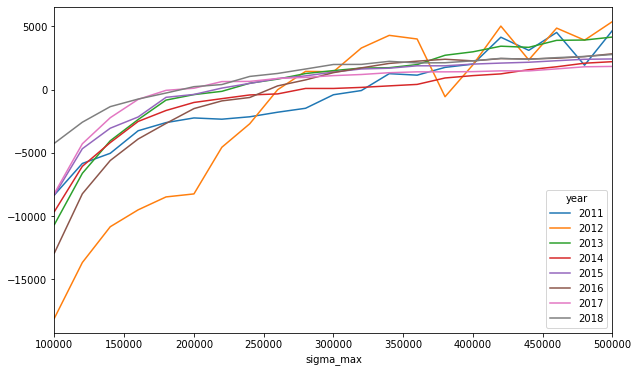

In [49]:
df3 = df2.reset_index()
df3 = df3.pivot(index='sigma_max', columns='year', values='slope')
df3.plot(figsize=(10,6))
#df3.plot(x='sigma_max', y='slope')

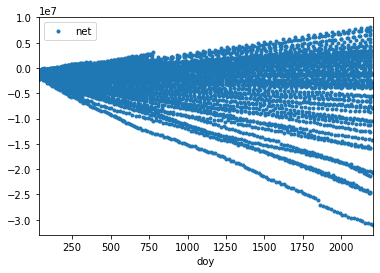

In [41]:
colors= {1e5: 'red', 2.5e5: 'green', 3e5: 'blue', 4.5e5:'yellow', 5e5:'brown'}
#df1 = df1[df1['ret_area'] > 0]
df.plot(x='doy',y='net',style='.')

In [42]:
df.sigma_max.unique()

array([100000., 250000., 300000., 450000., 500000.])